## **이분 탐색(Binary Search)**
 - **이분 탐색이란, 오름차순으로 정렬된 배열을 반복적으로 반으로 나누어 target이 선택될 때까지 탐색하는 알고리즘이다.**
 - <span style="color:red">**반복문**</span>과 <span style="color:red">**재귀**</span> 두 가지 방법을 사용할 수 있다.

 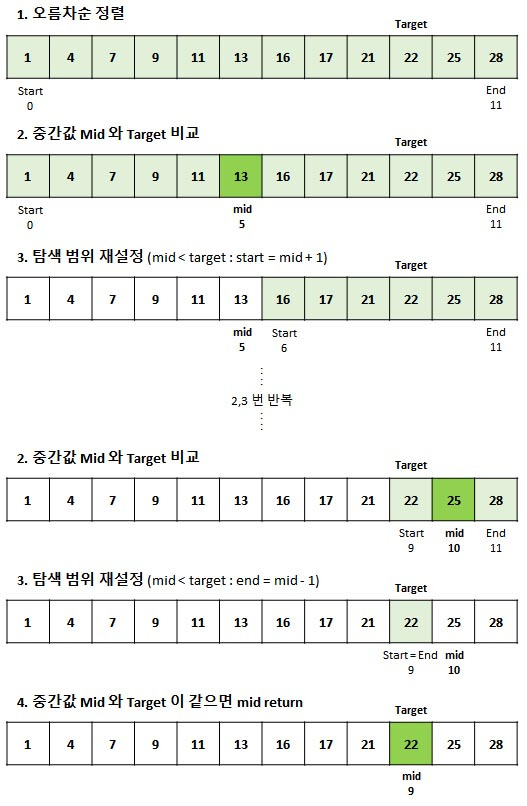

 - 이분 탐색의 조건 : 반드시 <span style="color:red">**오름차순으로 정렬**</span>된 상태에서 시작한다.
 - 시간복잡도 : **O(logN)**
 - 순서
  1. 자료를 <span style="color:red">**오름차순**</span>으로 정렬한다.
  2. 자료의 <span style="color:red">**중간값(mid)**</span>이 <span style="color:red">**찾고자 하는 값(target)**</span>인지 비교한다.
  3. mid의 값이 target과 다르다면 <span style="color:red">**대소관계**</span>를 비교하여 탐색 범위를 좁히고, target과 mid의 값이 같을 때까지 아래 조건에 따라 2번과 3번을 반복한다.
   - target이 mid값보다 <span style="color:red">**작으면 end를 mid 왼쪽 값**</span>으로 바꿔준다. (절반의 왼쪽 탐색)
   - target이 mid값보다 <span style="color:red">**크면 start를 mid 오른쪽 값**</span>으로 바꿔준다. (절반의 오른쪽 탐색)

#### **이분 탐색 반복문 구현**

In [ ]:
def binary_search(target, data):
    data.sort() # 정렬 (필수)
    start = 0 # 맨 처음 위치
    end = len(data) - 1 # 맨 마지막 위치

    while start <= end:
        mid = (start + end) // 2 # 중간값

        if data[mid] == target:
            return mid # target 위치 반환
        elif data[mid] > target: # target이 작으면 왼쪽을 더 탐색
            end = mid - 1
        else: # target이 크면 오른쪽을 더 탐색
            start = mid + 1
    return

#### **이분 탐색 재귀 구현**

In [ ]:
def binary_search(target, start, end):
    if start > end: # 범위를 넘어서도 못찾는다면 -1 return
        return -1
    
    mid = (start + end) // 2 # 중간값

    if data[mid] == target: # 중간값의 데이터가 target과 같다면 mid를 반환
        return mid
    elif data[mid] > target: # target이 작으면 왼쪽 탐색
        end = mid - 1
    else: # target이 크면 오른쪽 탐색
        start = mid + 1
    return binary_search(target, start, end) # 줄어든 범위 범위를 더 탐색

def solution(target, data):
    data.sort() # 정렬 (필수)
    start = 0
    end = len(data) - 1
    return binary_search(target, start, end)

data = []

11047번 동전 0 <span style="color:green">성공</span> - 2025.05.20

In [ ]:
n, k = map(int, input().split())
coins = [int(input()) for _ in range(n)]

sum = 0
ans = 0
for i in range(n - 1, -1, -1):
    while k - sum >= coins[i]:
        sum += coins[i]
        ans += 1
    if sum == k:
        print(ans)
        break

1931번 회의실 배정 <span style="color:red">실패</span> - 2025.05.21

In [ ]:
# 회의를 최대한 많이 진행하기 위해서는
# 1. 회의가 일찍 끝나는 순으로 정렬
# 1-1. 만약 끝나는 시간이 같은 경우 -> 회의 시작 시간 순으로 정렬 (ex.시작시간 == 끝시간)
# 2. i번째 회의 끝나는 시간 <= i+1번째 회의 시작 시간
# 그리디 알고리즘을 사용할 수 있는 이유 : 회의 시작 시간은 반드시 끝시간보다 작거나 같기때문
import sys
# input = sys.stdin.readline

n = int(input())
meetings = [list(map(int, input().split())) for _ in range(n)]
meetings.sort(lambda x : (x[1], x[0]))

ans = 0
time = 0
for start, end in meetings:
    if end <= start:
        ans += 1
        time = end

print(ans)

11399번 ATM <span style="color:green">성공</span> - 2025.05.22

In [ ]:
n = int(input())
time = list(map(int, input().split()))
time.sort(reverse=True)

ans = 0
for i in range(n):
    ans += time[i] * (i + 1)

print(ans)

1080번 행렬 <span style="color:green">성공</span> - 2025.05.23

In [ ]:
# 문제의 목적은 "최소 횟수"로 A를 B로 바꾸는 것
# -> A에서 어떤 칸이 0인데 B에서 이 칸이 1이라면 반드시 뒤집어야함
# 또한, 연산의 특성 상, 2번 이상 뒤집는 것은 의미 X -> 2번 뒤집으면 원래대로 돌아옴
# 따라서 반드시 뒤집어야하는 칸이 있다면 바꾼다.
# 왜 끝까지 확인하지 않고 -2까지만 확인하는지? 
# 한칸이라도 다른 칸이 있다면 반드시 뒤집어야하고,
# 같은 3X3에서 어떤 칸이 다르기에 뒤집은 것이므로
# 같은 3X3내에서 다른 칸이 다르다면 가준이 되는 칸도 바뀌므로 의미 X
def toggle(x, y):
    for i in range(3):
        for j in range(3):
            if a[x + i][y + j] == 0:
                a[x + i][y + j] = 1
            else:
                a[x + i][y + j] = 0

n, m = map(int, input().split())
a = [list(map(int, input())) for _ in range(n)]
b = [list(map(int, input())) for _ in range(n)]

ans = 0
for i in range(n - 2):
    for j in range(m - 2):
        if a[i][j] != b[i][j]:
            ans += 1
            toggle(i, j)

if a == b:
    print(ans)
else:
    print(-1)

2138번 전구와 스위치 <span style="color:red">실패</span> - 2025.05.24

In [ ]:
def toggle(i):
    if tmp[i] == 0: tmp[i] = 1
    else: tmp[i] = 0

n = int(input())
a = list(map(int, input()))
b = list(map(int, input()))

ans = 0
tmp = a[:]
for i in range(1, n):
    if i != n - 1:
        if tmp[i - 1] != b[i - 1]:
            ans += 1
            for j in range(i - 1, i + 2):
                toggle(j)
    else:
        if tmp[i - 1] != b[i - 1]:
            ans += 1
            for j in range(i - 1, i + 1):
                toggle(j)
if tmp == b:
    print(ans)
else:
    ans = 1
    tmp = a[:]
    for i in range(2):
        toggle(i)
    for i in range(1, n):
        if i != n - 1:
            if tmp[i - 1] != b[i - 1]:
                ans += 1
                for j in range(i - 1, i + 2):
                    toggle(j)
        else:
            if tmp[i - 1] != b[i - 1]:
                ans += 1
                for j in range(i - 1, i + 1):
                    toggle(j)
    if tmp == b:
        print(ans)
    else:
        print(-1)

1285번 동전 뒤집기 <span style="color:red">실패</span> - 2025.05.25

In [ ]:
# 브루트포스 + 비트마스크로 해결!
# 만약 n = 3이라면 000 ~ 111까지 비트가 1인 행을 뒤집은 뒤,
# T가 많은 열을 뒤집은 뒤, T개수 세기
# 이때 다음과 같은 식을 사용하면 -> min(t_cnt, n - t_cnt)
# 일일이 열에 대해 뒤집지 않고도 T의 개수를 셀 수 있음.
n = int(input())
coin = [list(input()) for _ in range(n)]
ans = n**2 + 1

for bit in range(1 << n):
    tmp = [coin[i][:] for i in range(n)]
    for i in range(n):
        if bit & (1 << i):
            for j in range(n):
                if tmp[i][j] == 'H':
                    tmp[i][j] = 'T'
                else:
                    tmp[i][j] = 'H'
    
    t_cnt = 0
    for i in range(n):
        cnt = 0
        for j in range(n):
            if tmp[j][i] == 'T':
                cnt += 1
        t_cnt += min(cnt, n - cnt)
    ans = min(ans, t_cnt)

print(ans)

1202번 보석 도둑 <span style="color:red">실패</span> - 2025.05.26

In [ ]:
import sys
import heapq
# input = sys.stdin.readline

n, k = map(int, input().split())
jewels = [list(map(int, input().split())) for _ in range(n)]
bags = [int(input()) for _ in range(k)]
jewels.sort()
bags.sort()

ans = 0
tmp = [] 
for bag in bags:
    while jewels and jewels[0][0] <= bag:
        heapq.heappush(tmp, -jewels[0][1])
        heapq.heappop(jewels)
    if tmp:
        ans -= heapq.heappop(tmp)
print(ans)

2109번 순회강연 <span style="color:green">성공</span> - 2025.05.27

In [ ]:
import sys
# input = sys.stdin.readline

n = int(input())
courses = [list(map(int, input().split())) for _ in range(n)]
courses.sort(key=lambda x : [x[0], -x[1]])

schedule = [0 for _ in range(10001)]
while courses:
    p, d = courses.pop()

    for i in range(d, 0, -1):
        if schedule[i] < p:
            schedule[i] = p
            break
print(sum(schedule))

12015번 가장 긴 증가하는 부분 수열 2 <span style="color:red">실패</span> - 2025.05.28

In [ ]:
# 개어렵다...
# 예제 입력과 (5, [10, 20, 30, 15, 50]) 입력 비교해서 이해하기
def binary_search(num):
    start = 0
    end = len(lis) - 1

    while start <= end:
        mid = (start + end) // 2

        if lis[mid] == num:
            return mid
        elif lis[mid] < num:
            start = mid + 1
        else:
            end = mid - 1
    return start

n = int(input())
a = list(map(int, input().split()))

lis = [a[0]]
for num in a:
    if lis[-1] < num:
        lis.append(num)
    else:
        idx = binary_search(num)
        lis[idx] = num

# print(lis)
print(len(lis))